## Introduction

Paragraph

## Importing and Cleaning Data

In this step, we will import the raw data from the kc_house_data.csv.   
In our initial look, we will dive into the column types, missing data,  
and duplicate entries.

Once we fix any error the raw data might cause, we will export the 'cleaned'  
data onto a different .csv file for future work.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

from IPython.display import display
pd.set_option('display.max_columns', None)

In [2]:
#importing csv to dataframe
df = pd.read_csv('data\kc_house_data.csv')

>importing the raw data from 'data\kc_house_data.csv' file

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


> After importing the raw data, our first observation reveals that we are missing values in 'waterfront', 'view', and 'yr_renovated'. 

>The columns 'price', 'waterfront', 'view', 'yr_renovated' are all floats and 'sqft_basement' is a string all opposed to being integers that we can work with.

In [4]:
#filling the nan's with 0, all is categorical columns with the mode being 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

df.loc[df['sqft_basement'] == '?'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [5]:
#changing columns from float to int
col_floats = ['price', 'waterfront', 'view', 'yr_renovated']
for col in col_floats:
    df[col] = df[col].astype(int)

In [6]:
#expanding the date column to a column for each month and year
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year

In [7]:
#creating seasonal columns
df['sold_spring_time'] = df['month_sold'] < 4
df['sold_summer_time'] = (df['month_sold'] > 3) & (df['month_sold'] < 7)
df['sold_fall_time'] = (df['month_sold'] > 6) & (df['month_sold'] < 10)
df['sold_winter_time'] = (df['month_sold'] > 9) & (df['month_sold'] < 13)

df['sold_spring_time'] = df['sold_spring_time'].astype(bool).astype(int)
df['sold_summer_time'] = df['sold_summer_time'].astype(bool).astype(int)
df['sold_fall_time'] = df['sold_fall_time'].astype(bool).astype(int)
df['sold_winter_time'] = df['sold_winter_time'].astype(bool).astype(int)

In [8]:
#converting 'yr_renovated' and 'sqft_basement' into a boolean
df['has_renovated'] = df['yr_renovated'].astype(bool).astype(int)
df['has_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [9]:
#deleting columns not neccesary in dataframe
df.drop('date', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
price               21597 non-null int32
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null int32
view                21597 non-null int32
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null int32
yr_built            21597 non-null int64
yr_renovated        21597 non-null int32
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
month_sold          21597 non-null int64
year_sold           21597 non-null int64
sold_spring_time    21

> the above table verifies that the data set is voided of any missing data.

> there are changes the data types on some of the columns to prep for work.


> Side note: we did also check for duplicated rows that leads to redundancies.


In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,0,0,0,1,1,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,1,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,0,0,0,1,0,1
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,1,0,0,0,0,0


> After cleaning the raw data, a new .csv file was created to act as a save point.

> This new .csv file is the same as the original except with the missing data being filled and data types being changed  appropriately.

In [12]:
# exports a clean version of raw data.
df.to_csv('data\Cleaned_raw_kc_house_data.csv')

## EDA and Scrubbing

In this step of the process, we will look into every column  
for any outliers and/or any other odd extremities.

This step is a huge factor when it comes down to the "fit"  
or accuracy of our model

This is also where we start making decisions on what kind of data  
should belong into our model.

### price

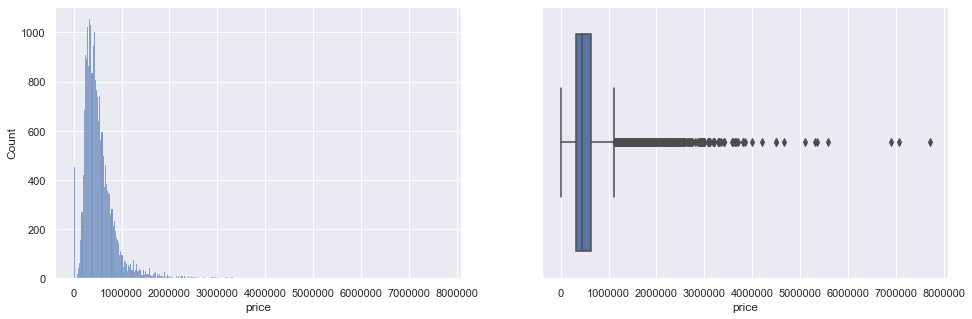

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

#looking for potential outliars
sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

In [14]:
#Making the 'price' benchmark between $150,000 to $710,000
df.drop(df[df['price'] > 710000].index, inplace = True)
df.drop(df[df['price'] < 150000].index, inplace = True)

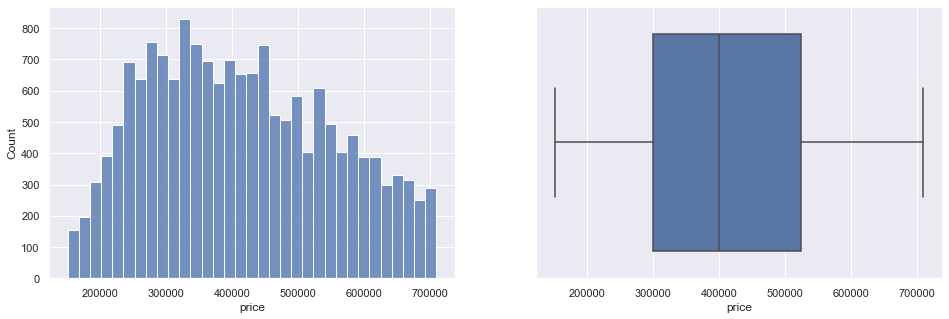

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

>The histogram and boxplot looks to be more normally distributed after removing outliers

### bedrooms

In [16]:
df['bedrooms'].value_counts()

3     8435
4     4686
2     2477
5      908
1      170
6      151
7       17
8        7
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

>the table above points out the outliers in our data set on how many bedrooms each house have

In [17]:
df.drop(df[df['bedrooms'] > 6].index, inplace = True)

In [18]:
df['bedrooms'].value_counts()

3    8435
4    4686
2    2477
5     908
1     170
6     151
Name: bedrooms, dtype: int64

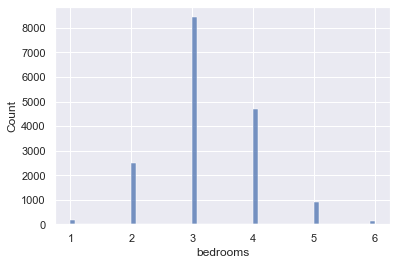

In [19]:
sns.histplot(data = df, x='bedrooms');

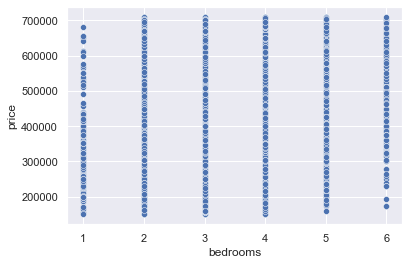

In [20]:
sns.scatterplot(data=df, x='bedrooms', y='price');

### bathrooms

In [21]:
df['bathrooms'].value_counts()

2.50    4134
1.00    3512
1.75    2713
2.00    1696
2.25    1660
1.50    1300
2.75     738
3.00     453
3.50     257
3.25     218
0.75      62
3.75      25
4.00      20
4.50      17
1.25       7
4.25       6
5.00       3
4.75       2
0.50       2
5.25       2
Name: bathrooms, dtype: int64

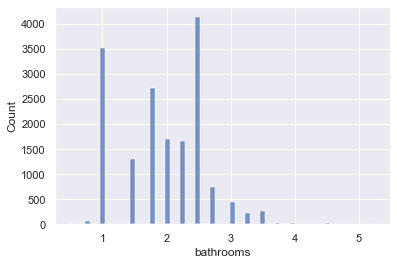

In [22]:
sns.histplot(data=df, x = 'bathrooms');

> the above table points out the outliers in our data-set on how many bathrooms each house in set have

In [23]:
df.drop(df[df['bathrooms'] > 4].index, inplace = True)
df.drop(df[df['bathrooms'] < 0.75].index, inplace = True)

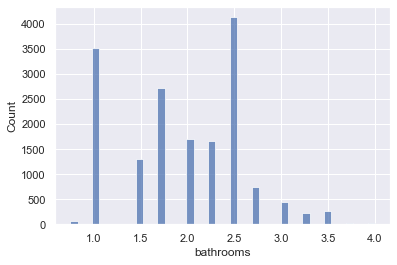

In [24]:
sns.histplot(data=df, x = 'bathrooms');

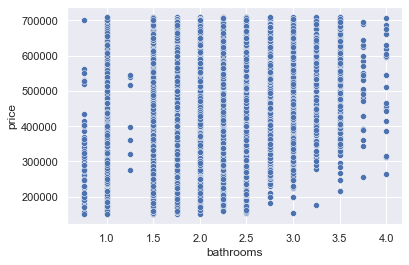

In [25]:
sns.scatterplot(data=df, x='bathrooms', y='price');

### sqft_living

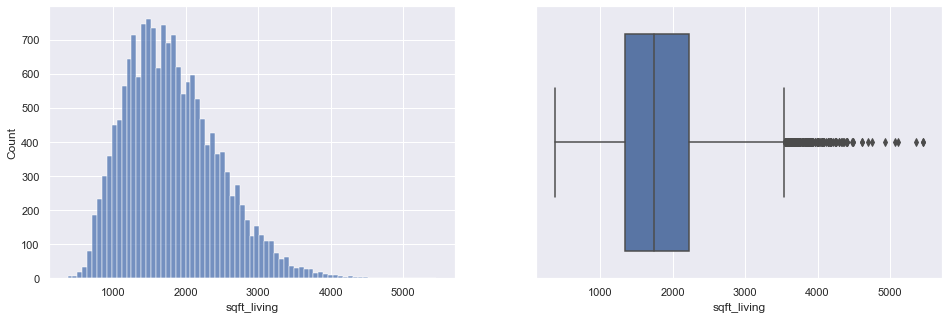

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [27]:
df.drop(df[df['sqft_living'] > 4500].index, inplace = True)

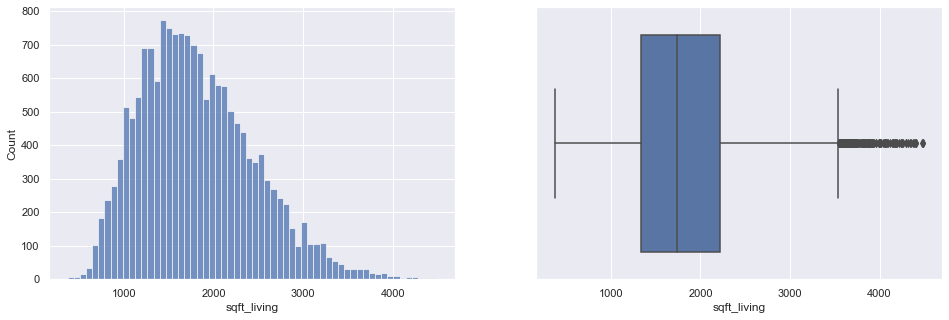

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

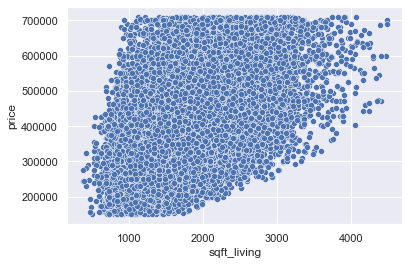

In [29]:
sns.scatterplot(data=df, x='sqft_living', y='price');

### sqft_lot

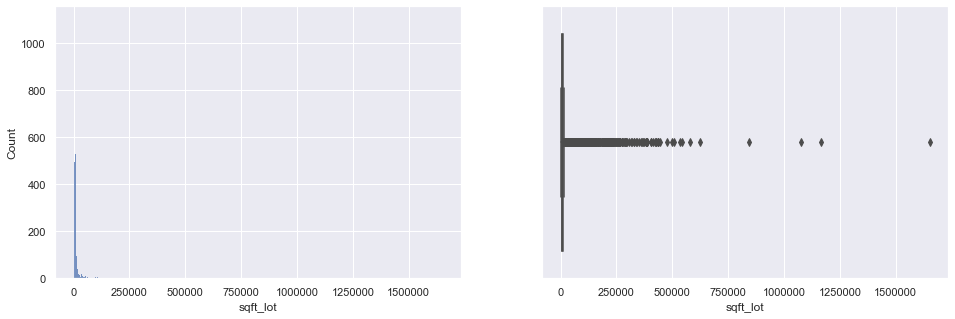

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [31]:
#df.drop(df[df['sqft_lot'] > 17500].index, inplace = True)
df.drop(df[df['sqft_lot'] > 14000].index, inplace = True)

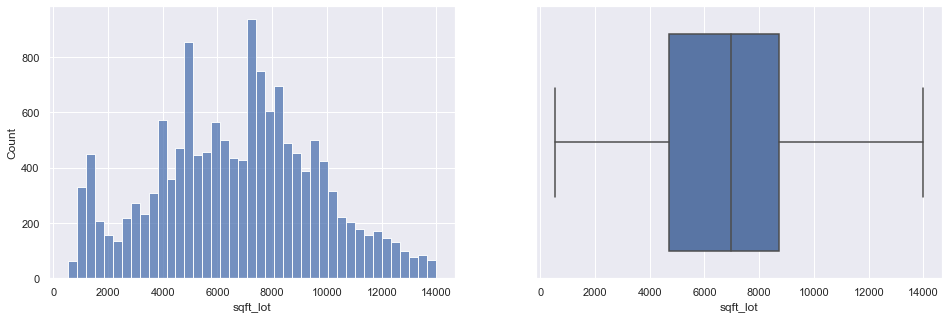

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [33]:
df['sqft_lot'].describe()

count    14520.000000
mean      6731.364945
std       2948.908855
min        520.000000
25%       4686.500000
50%       6983.000000
75%       8720.000000
max      14000.000000
Name: sqft_lot, dtype: float64

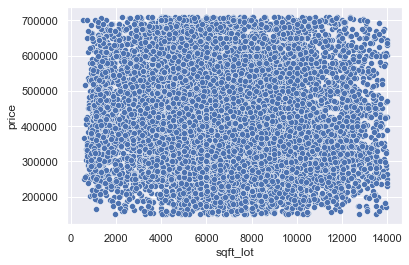

In [34]:
sns.scatterplot(data=df, x='sqft_lot', y='price');

### sqft_basement

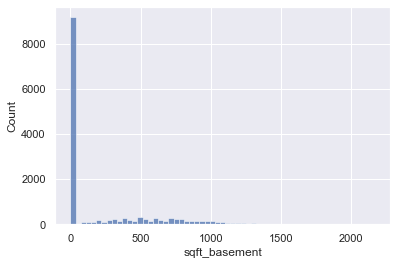

In [35]:
sns.histplot(data=df, x='sqft_basement');

In [36]:
df.drop(df[df['sqft_basement'] > 1300].index, inplace=True)

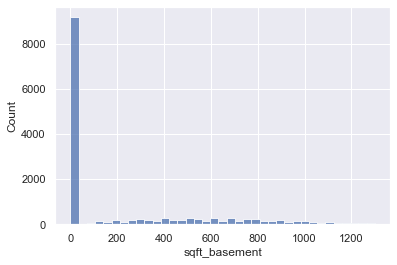

In [37]:
sns.histplot(data = df, x='sqft_basement');

#### has_basement

In [38]:
df['has_basement'].describe()

count    14385.000000
mean         0.362808
std          0.480827
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: has_basement, dtype: float64

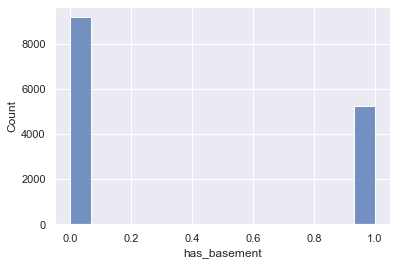

In [39]:
sns.histplot(data = df, x='has_basement');

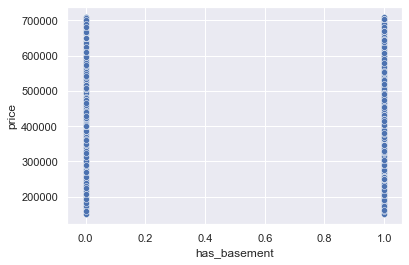

In [40]:
sns.scatterplot(data=df, x='has_basement', y='price');

### floors

In [41]:
df['floors'].value_counts()

1.0    7794
2.0    4823
1.5    1223
3.0     481
2.5      58
3.5       6
Name: floors, dtype: int64

In [42]:
df.drop(df[df['floors'] > 3].index, inplace=True)

In [43]:
df['floors'].value_counts()

1.0    7794
2.0    4823
1.5    1223
3.0     481
2.5      58
Name: floors, dtype: int64

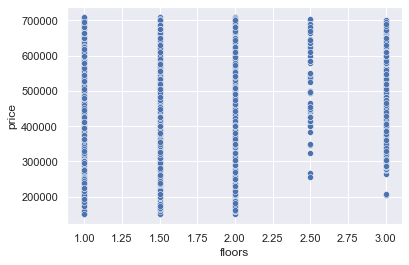

In [44]:
sns.scatterplot(data=df, x='floors', y='price');

### grade and condition

In [45]:
df['grade'].value_counts()

7     7442
8     4094
6     1689
9      889
5      145
10     107
4       10
11       2
3        1
Name: grade, dtype: int64

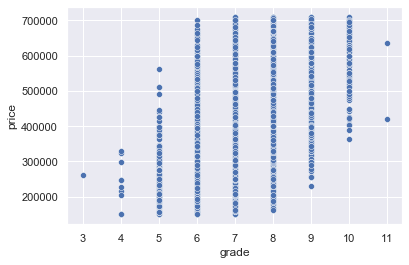

In [46]:
sns.scatterplot(data=df, x='grade', y='price');

In [47]:
df['condition'].value_counts()

3    9477
4    3719
5    1063
2     107
1      13
Name: condition, dtype: int64

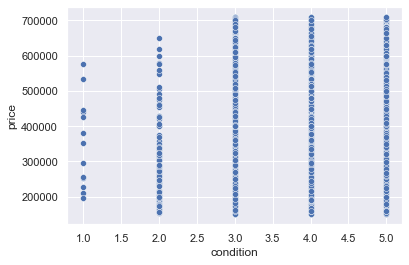

In [48]:
sns.scatterplot(data=df, x='condition', y='price');

### sqft_lot15

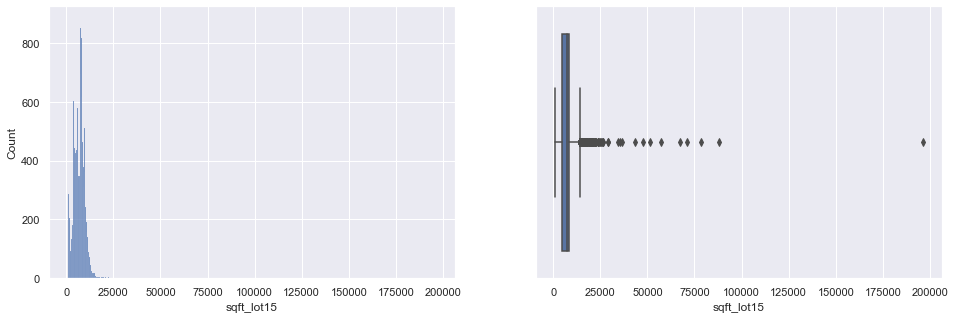

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [50]:
df.drop(df[df['sqft_lot15'] > 25000].index, inplace=True)

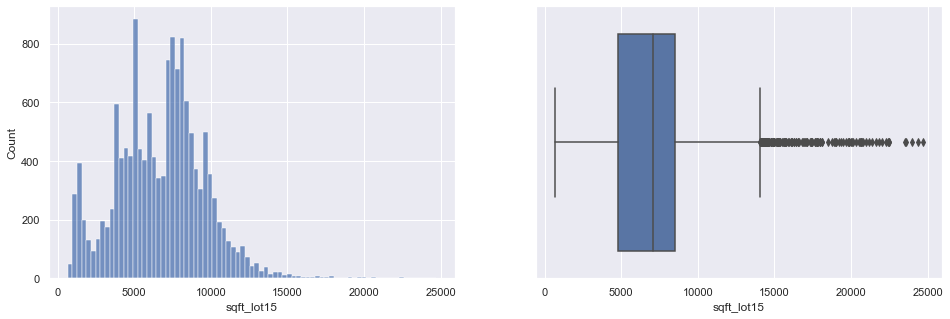

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

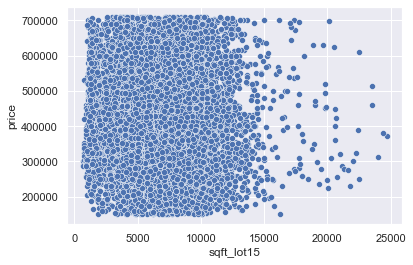

In [52]:
sns.scatterplot(data=df, x='sqft_lot15', y='price');

### sqft_living15

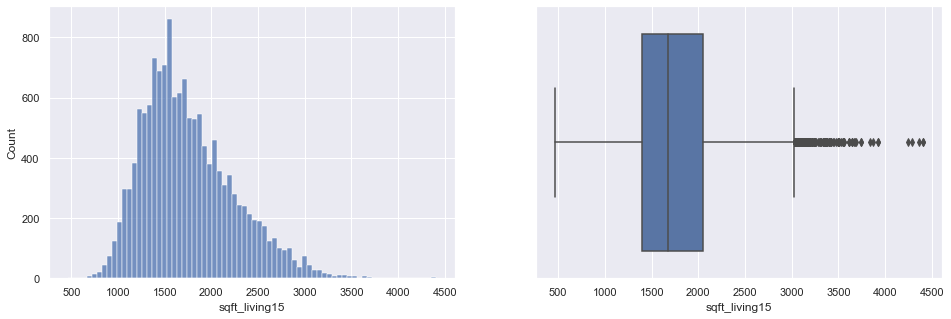

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living15', ax = ax[0])
sns.boxplot(data=df, x='sqft_living15', ax=ax[1]);

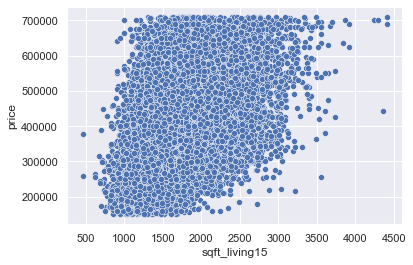

In [54]:
sns.scatterplot(data=df, x='sqft_living15', y='price');

### date

In [55]:
df['year_sold'].value_counts()

2014    9682
2015    4679
Name: year_sold, dtype: int64

> deleting year_sold for not having a variety of years being sold.

In [56]:
df.drop('year_sold', axis=1, inplace=True)

### waterfront

In [57]:
df['waterfront'].value_counts()

0    14354
1        7
Name: waterfront, dtype: int64

In [58]:
df.drop('waterfront', axis=1, inplace=True)

### view

In [59]:
df['view'].value_counts()

0    13699
2      374
1      141
3      124
4       23
Name: view, dtype: int64

### zipcode

In [60]:
# zipcode count
frequency = df.groupby('zipcode')['price'].count()

In [61]:
#avg price per zipcode
mean = df.groupby('zipcode').mean()['price']

In [62]:
cluster = pd.concat([frequency, mean], axis=1)

In [63]:
cluster['zipcode'] = cluster.index

In [64]:
cluster.columns = ['frequency','price', 'zipcode']
cluster.describe()

,frequency,price,zipcode
count,69.000000,69.000000,69.000000
mean,208.130435,419129.158868,98077.855072
std,126.780138,113929.160608,56.845062
min,16.000000,237994.197740,98001.000000
25%,114.000000,305616.090909,98029.000000
50%,210.000000,423468.496815,98070.000000
75%,263.000000,512619.479070,98118.000000
max,465.000000,630858.444444,98199.000000


In [65]:
# creating "cheap" group that sell below mean price(454585)
cluster_cheap = cluster[cluster.price < 454585]

# temporary cluster of the houses that sell above mean price
cluster_temp = cluster[cluster.price >= 454585]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_cheap_low_volume = cluster_cheap[cluster_cheap.frequency < 330]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_cheap_high_volume = cluster_cheap[cluster_cheap.frequency >= 330]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 278]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 280]

In [66]:
def get_zipcode_category(zipcode):
    # returns category from clusters
    if zipcode in cluster_cheap_low_volume.index:
        return 'cheap_low_volume'
    elif zipcode in cluster_cheap_high_volume.index:
        return 'cheap_high_volume'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'

In [67]:
# applying function and returning to a new column 'zipcode type'
df['zipcode_type'] = df.zipcode.apply(get_zipcode_category)

# viewing how our clusters look
df.zipcode_type.value_counts()


cheap_low_volume         4926
cheap_high_volume        4043
expensive_low_volume     3768
expensive_high_volume    1624
Name: zipcode_type, dtype: int64

## Continuous and Categorical Features

### Multi-collineary 

In [68]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
              'lat', 'long', 'sqft_living15', 'sqft_lot15']]

data_cont = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_cont['pairs'] = list(zip(data_cont.level_0, data_cont.level_1))
data_cont.set_index(['pairs'], inplace=True)
data_cont.drop(columns=['level_1', 'level_0'], inplace = True)
data_cont.columns = ['cc']
data_cont.drop_duplicates(inplace=True)
data_cont[(data_cont.cc>.70) & (data_cont.cc<1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.866243
"(sqft_living, sqft_above)",0.829318
"(sqft_living15, sqft_living)",0.711847


>Above table are showing some highly correlated continuous columns. We'll be dropping 'sqft_above', 'sqft_living15', and 'sqft_lot15' due to high correlation that will lead to fallacy in our model.

In [69]:
#creating seperate dataframe from the original to make changes
df_b = df

In [70]:
#dropping the multicollinearies and unwanted columns
df_b.drop('lat', axis = 1, inplace = True)
df_b.drop('long', axis = 1, inplace = True)
df_b.drop('sqft_above', axis = 1, inplace = True)
df_b.drop('sqft_living15', axis = 1, inplace = True)
df_b.drop('sqft_lot15', axis = 1, inplace = True)

> We are dropping 'lat' and 'long' columns because we'll be using zipcode instead. As well as dropping the 'view' columns because we believe it's not a big determining factor for house prices.

### Categorical / One Hot Encoded

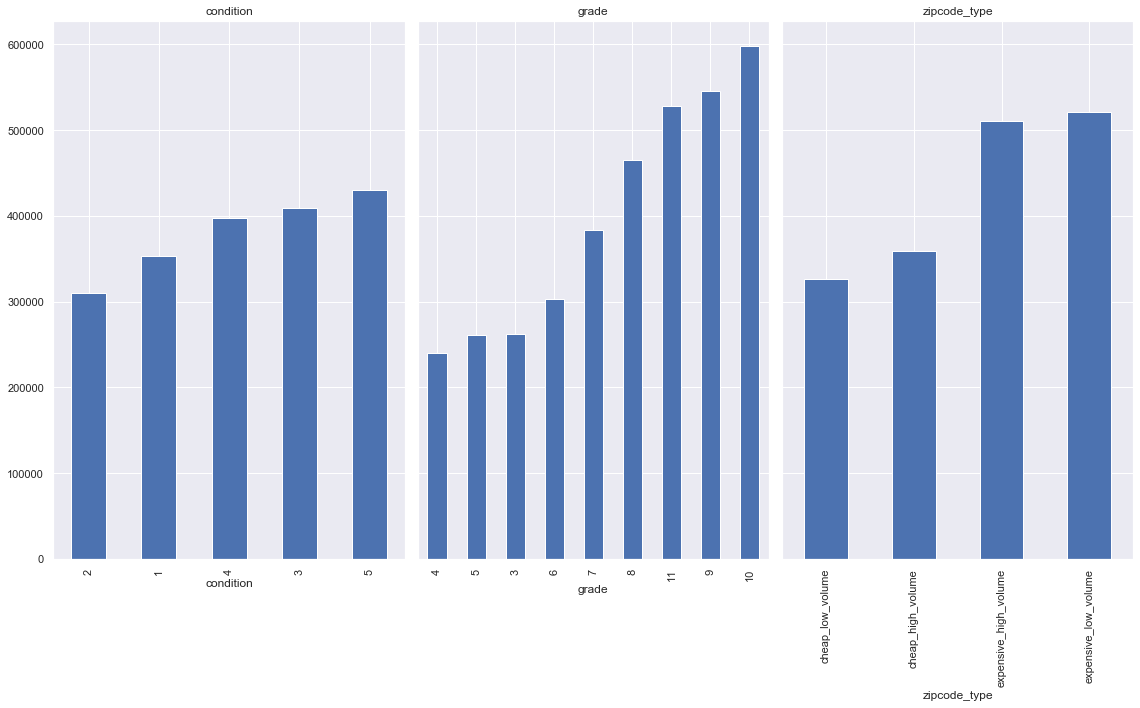

In [71]:
#looking at graphs to see columns shaped like a categorical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,10), sharey=True)

feats = ['condition', 'grade', 'zipcode_type']

for col, ax in zip(feats, axes.flatten()):
    (df.groupby(col)               
         .mean()['price']        
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)                
fig.tight_layout()

In [72]:
features = df[feats].astype('category')

In [73]:
feats_ohe = pd.get_dummies(features, drop_first = True)

In [74]:
feats_ohe = feats_ohe.astype(int)

In [75]:
feats_ohe.head()

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


### Baseline DataFrame

> Adding the new features to the baseline data

In [76]:
df_model = pd.concat([df_b, feats_ohe], axis = 1)

In [77]:
df_model.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'month_sold', 'sold_spring_time',
       'sold_summer_time', 'sold_fall_time', 'sold_winter_time',
       'has_renovated', 'has_basement', 'zipcode_type', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'zipcode_type_cheap_low_volume', 'zipcode_type_expensive_high_volume',
       'zipcode_type_expensive_low_volume'],
      dtype='object')

> dropping more unwanted columns from our baseline DataFrame

In [78]:
#dropping unwanted columns first
df_model.drop('view', axis = 1, inplace = True)
df_model.drop('yr_renovated', axis = 1, inplace = True)
df_model.drop('sqft_basement', axis = 1, inplace = True)

>Dropping 'condition', 'grade', and 'zipcode' since they're replaced with one hot encoded features

In [79]:
df_model.drop('condition', axis = 1, inplace = True)
df_model.drop('grade', axis = 1, inplace = True)
df_model.drop('zipcode', axis = 1, inplace = True)

In [80]:
df_model.drop('zipcode_type', axis = 1, inplace = True)

In [81]:
#checking to see the new dataset and ensuring that there is no missing values
df_model.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,month_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,221900,3,1.00,1180,5650,1.0,1955,10,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,1951,12,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,1933,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,604000,4,3.00,1960,5000,1.0,1965,12,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,510000,3,2.00,1680,8080,1.0,1987,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [82]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14361 entries, 0 to 21596
Data columns (total 21 columns):
price               14361 non-null int32
bedrooms            14361 non-null int64
bathrooms           14361 non-null float64
sqft_living         14361 non-null int64
sqft_lot            14361 non-null int64
floors              14361 non-null float64
view                14361 non-null int32
condition           14361 non-null int64
grade               14361 non-null int64
sqft_basement       14361 non-null int32
yr_built            14361 non-null int64
yr_renovated        14361 non-null int32
zipcode             14361 non-null int64
month_sold          14361 non-null int64
sold_spring_time    14361 non-null int32
sold_summer_time    14361 non-null int32
sold_fall_time      14361 non-null int32
sold_winter_time    14361 non-null int32
has_renovated       14361 non-null int32
has_basement        14361 non-null int32
zipcode_type        14361 non-null object
dtypes: float64(2), int32

## First Model - Baseline


### Train-Test Split

In [83]:
#importing the necessary libraries for train-test split
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

In [84]:
y = df_model[['price']]
X = df_model.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [85]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [86]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [87]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 81382.75
RMSE Test: 81428.8


###  model

In [88]:
from statsmodels.formula.api import ols

In [89]:
# Fitting the actual model
outcome = 'price'
x_cols = list(df_model.columns)
x_cols.remove('price')

data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
#model = ols(formula=formula, data = dftrain).fit()
model = ols(formula=formula, data = data).fit()
model.summary()

#df_model = pd.concat([df_b, feats_ohe], axis = 1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     796.3
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:30:08   Log-Likelihood:            -1.4619e+05
No. Observations:               11488   AIC:                         2.924e+05
Df Residuals:                   11460   BIC:                         2.927e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           2.086e+06   9.19e+04     22.689      0.000    1.91e+06    2.27e+06
bedrooms                           -6277.0417   1225.832     -5.121      0.000   -8679.883   -3874.201
bathrooms                           1.139e+04   2023.084      5.628      0.000    7419.869    1.54e+04
sqft_living                           81.1039      2.262     35.856      0.000      76.670      85.538
sqft_lot                              -2.9364      0.340     -8.634      0.000      -3.603      -2.270
floors                              8681.1522   2261.055      3.839      0.000    4249.099    1.31e+04
yr_built                           -1256.0554     40.630    -30.914      0.000   -1335.698   -1176.413
month_sold                         -2359.0080    936.195     -2.520      0.012   -4194.110    -523.906
sold_spring_time                    5.154e+05   2.32e+04     22.223      0.000     4.7e+05    5.61e+05
sold_summer_time                    5.263e+05    2.3e+04     22.896      0.000    4.81e+05    5.71e+05
sold_fall_time                      5.199e+05   2.31e+04     22.473      0.000    4.75e+05    5.65e+05
sold_winter_time                    5.241e+05   2.36e+04     22.240      0.000    4.78e+05     5.7e+05
has_renovated                      -4394.5686   5191.216     -0.847      0.397   -1.46e+04    5781.103
has_basement                        1.191e+04   1896.102      6.283      0.000    8197.160    1.56e+04
condition_2                         2.574e+04   2.61e+04      0.985      0.325   -2.55e+04    7.69e+04
condition_3                         5.846e+04   2.47e+04      2.370      0.018    1.01e+04    1.07e+05
condition_4                         6.173e+04   2.47e+04      2.502      0.012    1.34e+04     1.1e+05
condition_5                         9.006e+04   2.48e+04      3.635      0.000    4.15e+04    1.39e+05
grade_4                             2680.3002   8.65e+04      0.031      0.975   -1.67e+05    1.72e+05
grade_5                            -5.877e+04    8.2e+04     -0.717      0.473   -2.19e+05    1.02e+05
grade_6                             -1.34e+04   8.16e+04     -0.164      0.870   -1.73e+05    1.47e+05
grade_7                              3.11e+04   8.16e+04      0.381      0.703   -1.29e+05    1.91e+05
grade_8                             8.012e+04   8.17e+04      0.981      0.327      -8e+04     2.4e+05
grade_9                              1.37e+05   8.18e+04      1.676      0.094   -2.32e+04    2.97e+05
grade_10                            1.611e+05   8.21e+04      1.961      0.050      47.701    3.22e+05
grade_11                            1.059e+05      1e+05      1.059      0.289   -9.01e+04    3.02e+05
zipcode_type_cheap_low_volume        -2.8e+04   1943.027    -14.408      0.000   -3.18e+04   -2.

### Checking QQ Plot

In [90]:
import statsmodels.api as sm

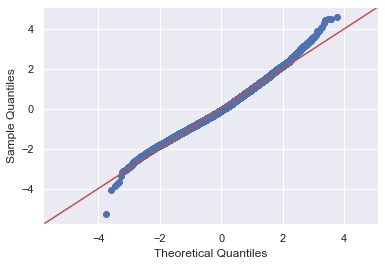

In [91]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for Homoscedasticity

In [92]:
len(df_model)

14361

In [93]:
len(X_train)

11488

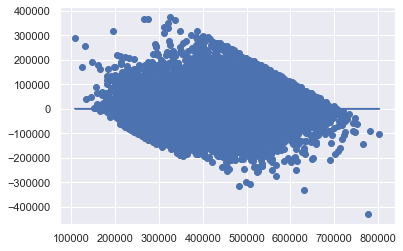

In [94]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

## Second Model - Multicollinearies

### checking and fixing multicollinearies

In [95]:
#Importing variance inflation factor to check for multicollinearies 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
col = df_model[x_cols]
vif = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.7823459418899419),
 ('bathrooms', 3.0290641083137673),
 ('sqft_living', 3.1783056653777786),
 ('sqft_lot', 1.7305991169740684),
 ('floors', 2.6461494839103885),
 ('yr_built', 2.5089595203209103),
 ('month_sold', 14.914925225850615),
 ('sold_spring_time', 4960.545000908538),
 ('sold_summer_time', 8008.552090800591),
 ('sold_fall_time', 7101.878149824635),
 ('sold_winter_time', 5803.060957901453),
 ('has_renovated', 1.073950086004822),
 ('has_basement', 1.4295788392844948),
 ('condition_2', 9.032448450585),
 ('condition_3', 250.2619976600087),
 ('condition_4', 213.6220359151401),
 ('condition_5', 76.9790430063947),
 ('grade_4', 11.013343656474001),
 ('grade_5', 143.86184343887695),
 ('grade_6', 1493.9701129982345),
 ('grade_7', 3596.968255769341),
 ('grade_8', 2937.648989199414),
 ('grade_9', 836.693934763113),
 ('grade_10', 107.6785725944452),
 ('grade_11', 3.010167250578652),
 ('zipcode_type_cheap_low_volume', 1.4683971785890966),
 ('zipcode_type_expensive_high_volume',

In [97]:
vif_scores = list(zip(x_cols, vif))
v_test = [x for x, vif in vif_scores if vif > 10]
print(len(vif_scores), len(v_test))

28 15


In [98]:
v_test

['month_sold',
 'sold_spring_time',
 'sold_summer_time',
 'sold_fall_time',
 'sold_winter_time',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10']

In [99]:
for v in v_test:
    df_model.drop(v, axis=1, inplace=True)

In [100]:
df_model.drop('condition_2', axis = 1, inplace = True)

In [101]:
df_model.drop('grade_11', axis = 1, inplace = True)

In [102]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14361 entries, 0 to 21596
Data columns (total 12 columns):
price                                 14361 non-null int32
bedrooms                              14361 non-null int64
bathrooms                             14361 non-null float64
sqft_living                           14361 non-null int64
sqft_lot                              14361 non-null int64
floors                                14361 non-null float64
yr_built                              14361 non-null int64
has_renovated                         14361 non-null int32
has_basement                          14361 non-null int32
zipcode_type_cheap_low_volume         14361 non-null int32
zipcode_type_expensive_high_volume    14361 non-null int32
zipcode_type_expensive_low_volume     14361 non-null int32
dtypes: float64(2), int32(6), int64(4)
memory usage: 1.1 MB


### Train-Test Split

In [103]:
y = df_model['price']
X = df_model.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [104]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [105]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [106]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 86534.63
RMSE Test: 86086.46


### model

In [107]:
x_cols = list(df_model.columns)
x_cols.remove('price')

data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1611.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:30:10   Log-Likelihood:            -1.4690e+05
No. Observations:               11488   AIC:                         2.938e+05
Df Residuals:                   11476   BIC:                         2.939e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           2.005e+06   7.54e+04     26.599      0.000    1.86e+06    2.15e+06
bedrooms                           -1.119e+04   1279.752     -8.745      0.000   -1.37e+04   -8683.110
bathrooms                           1.662e+04   2123.122      7.829      0.000    1.25e+04    2.08e+04
sqft_living                          111.9537      2.193     51.039      0.000     107.654     116.253
sqft_lot                              -2.5775      0.358     -7.198      0.000      -3.279      -1.876
floors                              1.602e+04   2373.477      6.750      0.000    1.14e+04    2.07e+04
yr_built                            -935.6536     39.230    -23.850      0.000   -1012.552    -858.755
has_renovated                      -5852.4495   5466.167     -1.071      0.284   -1.66e+04    4862.171
has_basement                        9666.2373   1992.011      4.853      0.000    5761.555    1.36e+04
zipcode_type_cheap_low_volume      -3.092e+04   2057.682    -15.024      0.000   -3.49e+04   -2.69e+04
zipcode_type_expensive_high_volume  1.466e+05   3002.367     48.840      0.000    1.41e+05    1.53e+05
zipcode_type_expensive_low_volume    1.46e+05   2247.950     64.969      0.000    1.42e+05     1.5e+05
==============================================================================
Omnibus:                      274.685   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.242
Skew:                           0.359   Prob(JB):                     1.42e-66
Kurtosis:                       3.343   Cond. No.                     7.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ Plot

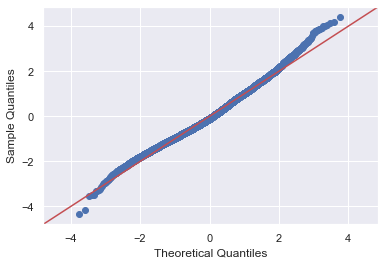

In [108]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasticity

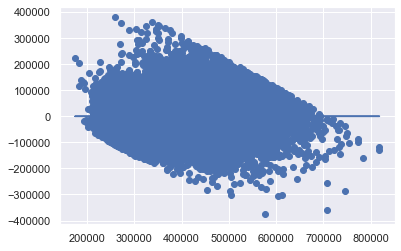

In [109]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

## Third Model - P_Values

### finding and fixing high p_values

In [110]:
# finding the high p values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)

In [111]:
#showing the high p values
high_p_values = list(p_table[p_table['P>|t|'] >= 0.05].index)
print("Our high p_values columns:", high_p_values)

Our high p_values columns: ['has_renovated']


In [112]:
for col in high_p_values:
    df_model.drop(col, axis=1, inplace=True)

In [113]:
# leaving the high p values out.
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

### Train-Test Split

In [114]:
y = df_model['price']
X = df_model[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [115]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [116]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [117]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 86538.95
RMSE Test: 86058.38


### model

In [118]:
data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1771.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:30:11   Log-Likelihood:            -1.4690e+05
No. Observations:               11488   AIC:                         2.938e+05
Df Residuals:                   11477   BIC:                         2.939e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.986e+06   7.33e+04     27.097      0.000    1.84e+06    2.13e+06
bedrooms                           -1.115e+04   1279.133     -8.716      0.000   -1.37e+04   -8641.445
bathrooms                           1.642e+04   2114.840      7.765      0.000    1.23e+04    2.06e+04
sqft_living                          111.9262      2.193     51.030      0.000     107.627     116.226
sqft_lot                              -2.5744      0.358     -7.189      0.000      -3.276      -1.872
floors                               1.59e+04   2370.954      6.707      0.000    1.13e+04    2.06e+04
yr_built                            -925.9454     38.168    -24.259      0.000   -1000.762    -851.129
has_basement                        9725.5241   1991.254      4.884      0.000    5822.326    1.36e+04
zipcode_type_cheap_low_volume      -3.094e+04   2057.567    -15.037      0.000    -3.5e+04   -2.69e+04
zipcode_type_expensive_high_volume  1.467e+05   3001.304     48.886      0.000    1.41e+05    1.53e+05
zipcode_type_expensive_low_volume    1.46e+05   2247.964     64.968      0.000    1.42e+05     1.5e+05
==============================================================================
Omnibus:                      274.583   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.183
Skew:                           0.359   Prob(JB):                     1.46e-66
Kurtosis:                       3.344   Cond. No.                     7.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ plot

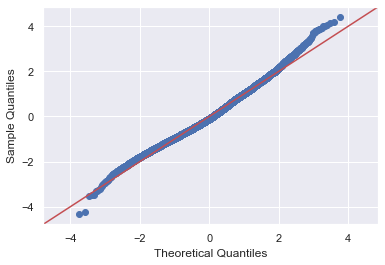

In [119]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasiticity

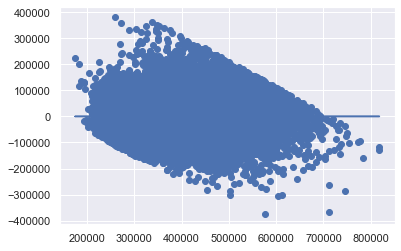

In [120]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

## Fourth Model  - Transformation

### adding log values to 'continuous' columns

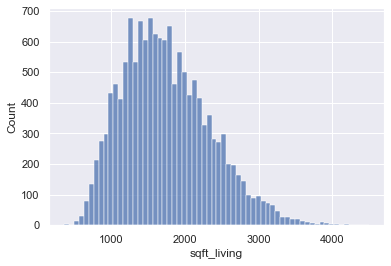

In [121]:
cont = ['sqft_living','sqft_lot']

sns.histplot(data = df_model, x = 'sqft_living');

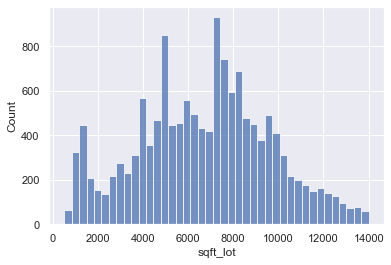

In [122]:
sns.histplot(data = df_model, x = 'sqft_lot');

In [123]:
dfcont = df_model[cont]
log_names = [f'{column}_log' for column in dfcont.columns]

df_log = np.log(dfcont)
df_log.columns = log_names

for col in df_log:
    df_model[col] = df_log[col]

In [124]:
df_model.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,has_basement,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume,sqft_living_log,sqft_lot_log
0,221900,3,1.00,1180,5650,1.0,1955,0,1,0,0,7.073270,8.639411
1,538000,3,2.25,2570,7242,2.0,1951,1,0,0,0,7.851661,8.887653
2,180000,2,1.00,770,10000,1.0,1933,0,1,0,0,6.646391,9.210340
3,604000,4,3.00,1960,5000,1.0,1965,1,0,0,1,7.580700,8.517193
4,510000,3,2.00,1680,8080,1.0,1987,0,0,0,1,7.426549,8.997147


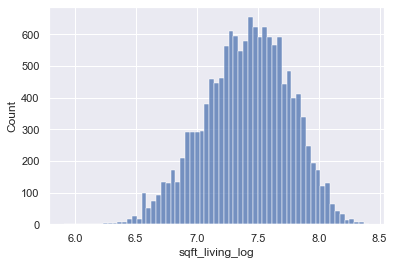

In [125]:
sns.histplot(data = df_model, x = 'sqft_living_log');

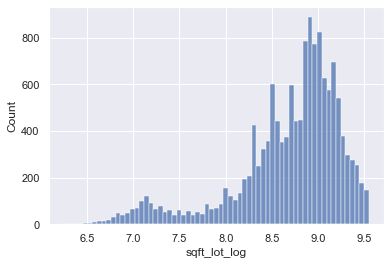

In [126]:
sns.histplot(data = df_model, x = 'sqft_lot_log');

In [127]:
x_cols.remove('sqft_living')
#x_cols.remove('sqft_lot')

x_cols.append('sqft_living_log')
#x_cols.append('sqft_lot_log')

In [128]:
df_model.drop('sqft_living', axis=1, inplace=True)
df_model.drop('sqft_lot_log', axis=1, inplace=True)

### Train-Test Split

In [129]:
y = df_model['price']
X = df_model.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [130]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'yr_built',
       'has_basement', 'zipcode_type_cheap_low_volume',
       'zipcode_type_expensive_high_volume',
       'zipcode_type_expensive_low_volume', 'sqft_living_log'],
      dtype='object')

In [131]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [132]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [133]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 87292.55
RMSE Test: 87189.59


### model

In [134]:
data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1721.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:30:13   Log-Likelihood:            -1.4700e+05
No. Observations:               11488   AIC:                         2.940e+05
Df Residuals:                   11477   BIC:                         2.941e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           7.992e+05   7.78e+04     10.278      0.000    6.47e+05    9.52e+05
bedrooms                           -1.271e+04   1312.660     -9.680      0.000   -1.53e+04   -1.01e+04
bathrooms                           1.543e+04   2157.218      7.152      0.000    1.12e+04    1.97e+04
sqft_lot                              -2.6952      0.363     -7.416      0.000      -3.408      -1.983
floors                              1.528e+04   2398.054      6.370      0.000    1.06e+04       2e+04
yr_built                            -952.3239     38.499    -24.736      0.000   -1027.788    -876.860
has_basement                        3649.7461   2040.736      1.788      0.074    -350.445    7649.937
zipcode_type_cheap_low_volume      -3.045e+04   2075.634    -14.671      0.000   -3.45e+04   -2.64e+04
zipcode_type_expensive_high_volume  1.458e+05   3027.421     48.176      0.000     1.4e+05    1.52e+05
zipcode_type_expensive_low_volume   1.455e+05   2268.153     64.148      0.000    1.41e+05     1.5e+05
sqft_living_log                     1.951e+05   4014.783     48.600      0.000    1.87e+05    2.03e+05
==============================================================================
Omnibus:                      263.142   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.677
Skew:                           0.362   Prob(JB):                     1.52e-62
Kurtosis:                       3.267   Cond. No.                     7.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ Plot

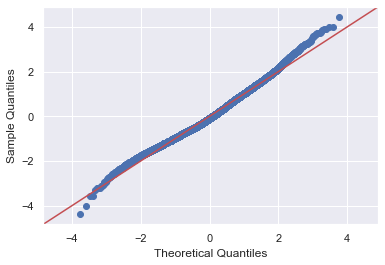

In [135]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

###  Homoscedasiticity

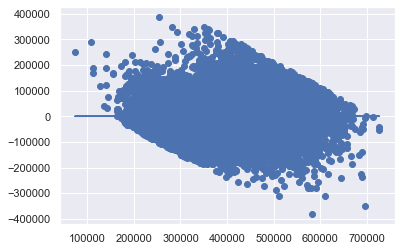

In [136]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

## predictive function

In [137]:
df['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 14361, dtype: int64

In [138]:
def King_County_Predicting_Price(bedrooms, bathrooms, sqft_lot, floors, yr_built, has_basement, zipcode, sqft_living):
    
    cheap_low_volume = 0
    expensive_high_volume = 0
    expensive_low_volume = 0
    
    zip_type = get_zipcode_category(zipcode)
    
    if zip_type == 'cheap_low_volume':
        cheap_low_volume = 1
    elif zip_type == 'expensive_high_volume':
        expensive_high_volume = 1
    elif zip_type == 'expensive_low_volume':
        expensive_low_volume = 1
        
    predicted_price = linreg.predict(np.array([bedrooms, bathrooms, sqft_lot,
                                               floors, yr_built, has_basement,
                                               cheap_low_volume, expensive_high_volume,
                                               expensive_low_volume, np.log(sqft_living)])
                                     .reshape(1, -1))[0]
    
    return "$ {:,}".format(round(predicted_price))

In [139]:
bedrooms = 3
bathrooms = 2
sqft_lot = 1000
floors = 1
yr_built = 2005
has_basement = 0
zipcode = 98178
sqft_living = 1200

print(King_County_Predicting_Price(bedrooms, bathrooms, sqft_lot, floors, yr_built, has_basement, zipcode, sqft_living))

$ 248,087
